In [28]:
import numpy as np
import random
import math
from scipy.stats import norm
import matplotlib.pyplot as plt

In [80]:
# init parameters
m = 2000
d = 2000
s = d/100
beta = 2

iterations = 100*d

In [76]:
mse_errors = []

def mse(X, y, theta): 
    return ((y - X @ theta) ** 2).sum()

def generate_data(m, d): 
    X = np.random.normal(0, 1, (m, d))
    theta_true = np.random.randint(2, size=d)
    y = X @ theta_true + np.random.normal(0, 1, m)

    return X, y, theta_true

def compute_losses(iterations, beta, m, d ):

    X, y, theta_true = generate_data(m, d)
    losses = []

    theta = np.random.randint(2, size=d) # initialize theta randomly with 0 and 1s

    for _ in range(iterations): 
        pos = np.random.randint(0, d) 
        theta1 = theta.copy()
        theta1[pos] = not theta[pos]  # get new theta with only one digit changed

        comp = np.exp(-beta * (mse(X, y, theta1) - mse(X, y, theta)))
        acceptance = min(1, comp)

        # change state with acceptance probability
        if np.random.rand(1)[0] < acceptance : 
            theta = theta1

        # compute loss
        mse_val = ((theta-theta_true)**2).mean()*(2/d)
        mse_errors.append(mse_val)

    return mse_errors


/var/folders/pw/_lszqphd0sj2lsl8tyw057lc0000gn/T/ipykernel_63723/2182672511.py:25: RuntimeWarning: overflow encountered in exp
  comp = np.exp(-beta * (mse(X, y, theta1) - mse(X, y, theta)))


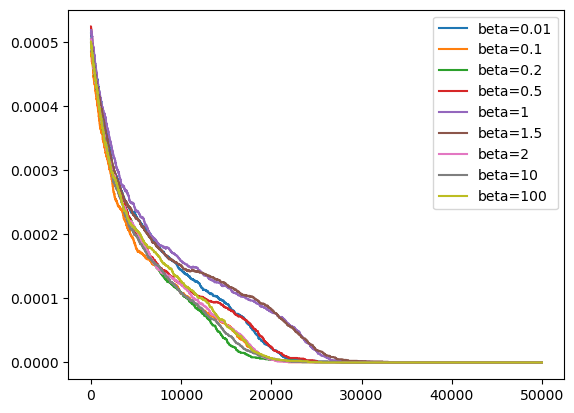

In [79]:
iterations = 50000
plt.plot(compute_losses(iterations, 0.01, m, d), label = 'beta=0.01')
plt.plot(compute_losses(iterations, 0.1, m, d), label = 'beta=0.1')
plt.plot(compute_losses(iterations, 0.2, m, d), label = 'beta=0.2')
plt.plot(compute_losses(iterations, 0.5, m, d), label = 'beta=0.5')
plt.plot(compute_losses(iterations, 1, m, d), label = 'beta=1')
plt.plot(compute_losses(iterations, 1.5, m, d), label = 'beta=1.5')
plt.plot(compute_losses(iterations, 2, m, d), label = 'beta=2')
plt.plot(compute_losses(iterations, 10, m, d), label = 'beta=10')
plt.plot(compute_losses(iterations, 100, m, d), label = 'beta=100')

plt.legend()
plt.show()

In [48]:
def simulation_annealing(iterations, beta, m, d ):

    X, y, theta_true = generate_data(m, d)
    losses = []
    theta = np.random.randint(2, size=d) # initialize theta randomly with 0 and 1s
    
    change_beta_every = math.floor(iterations/20)

    for _ in range(iterations): 
        pos = np.random.randint(0, d) 
        theta1 = theta.copy()
        theta1[pos] = not theta[pos]  # get new theta with only one digit changed

        comp = np.exp(-beta * (mse(X, y, theta1) - mse(X, y, theta)))
        acceptance = min(1, comp)

        # change state with acceptance probability
        if np.random.rand(1)[0] < acceptance : 
            theta = theta1
        
        if iterations % change_beta_every == 0: 
            beta *= 1.1
        
        # compute loss
        mse_val = ((theta-theta_true)**2).mean()*(2/d)
        losses.append(mse_val)

    return losses


/var/folders/pw/_lszqphd0sj2lsl8tyw057lc0000gn/T/ipykernel_63723/3829127174.py:14: RuntimeWarning: overflow encountered in exp
  comp = np.exp(-beta * (mse(X, y, theta1) - mse(X, y, theta)))
/var/folders/pw/_lszqphd0sj2lsl8tyw057lc0000gn/T/ipykernel_63723/3829127174.py:14: RuntimeWarning: overflow encountered in scalar multiply
  comp = np.exp(-beta * (mse(X, y, theta1) - mse(X, y, theta)))


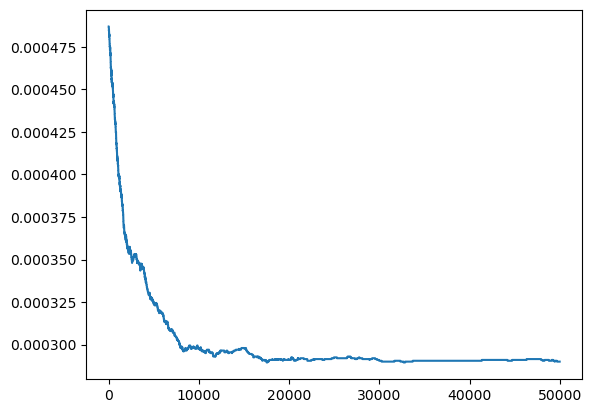

In [49]:
plt.plot(simulation_annealing(iterations, 0.1, m, d))

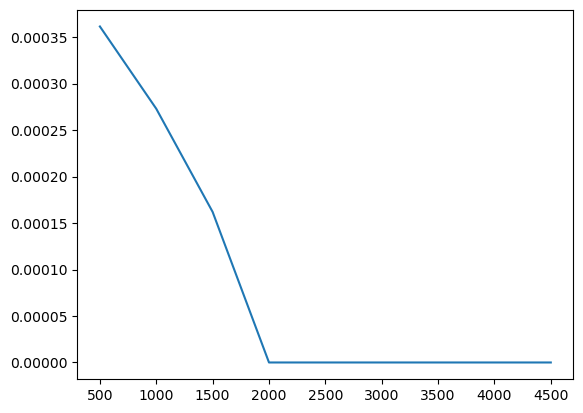

In [63]:

losses_m = []
m_values = np.arange(500,5000, 500)
for m_value in  m_values: 
    losses_m.append(get_samples(iterations, 0.5, m_value, d)[-1])
plt.plot(m_values, losses) # always changes


In [114]:
def generate_data(m, d, s): 
    X = np.random.normal(0, 1, (m, d))
    theta_true = [0] * int(d - s) + [1] * int(s)
    random.shuffle(theta_true)
    theta_true = np.array(theta_true)
    y = X @ theta_true + np.random.normal(0, 1, m)

    return X, y, theta_true


def compute_losses_s(iterations, beta, m, d, s):

    X, y, theta_true = generate_data(m, d, s)
    losses = []

    theta = [0] * int(d - s) + [1] * int(s)
    random.shuffle(theta) # initialize theta randomly with 0 and 1s
    theta = np.array(theta)


    for _ in range(iterations): 
        
        theta1 = theta.copy()
        
        zeros_indices = np.where(theta == 0)[0]
        ones_indices = np.where(theta == 1)[0]
        pos_zero = np.random.choice(zeros_indices)
        pos_one = np.random.choice(ones_indices)
        
        theta1[pos_zero] = 1
        theta1[pos_one] = 0

        comp = np.exp(-beta * (mse(X, y, theta1) - mse(X, y, theta)))
        acceptance = min(1, comp)

        # change state with acceptance probability
        if np.random.rand(1)[0] < acceptance : 
            theta = theta1

        # compute loss
        mse_val = ((theta-theta_true)**2).mean()*(1/(2*s))
        losses.append(mse_val)

    return losses


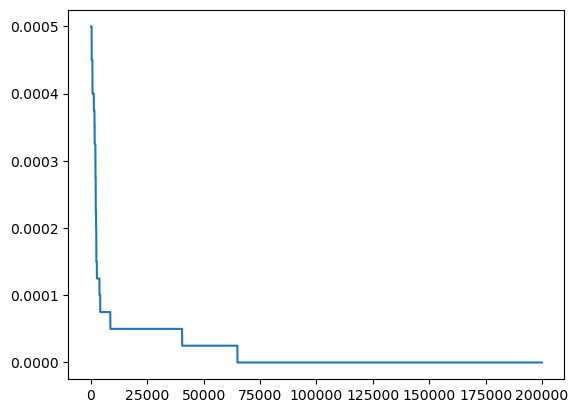

In [115]:
plt.plot(compute_losses_s(iterations, 0.1, m, d, s))

/var/folders/pw/_lszqphd0sj2lsl8tyw057lc0000gn/T/ipykernel_63723/2157463240.py:33: RuntimeWarning: overflow encountered in exp
  comp = np.exp(-beta * (mse(X, y, theta1) - mse(X, y, theta)))


ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

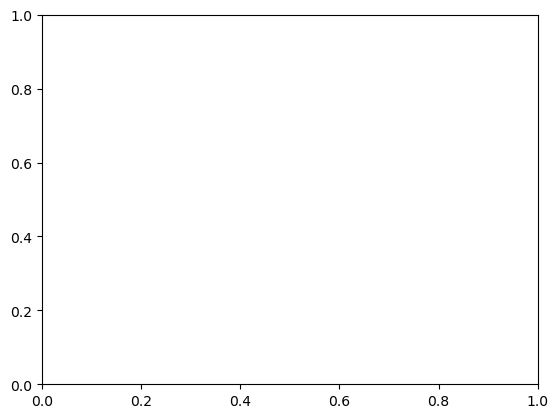

In [117]:
losses_m = []
m_values = np.arange(500,5000, 500)
for m_value in  m_values: 
    losses_m.append(compute_losses_s(iterations, 0.5, m_value, d, s)[-1])
plt.plot(m_values / d, losses) # always changesones_indices

In [165]:
def generate_data(m, d, s): 
    X = np.random.normal(0, 1, (m, d))
    theta_true = [0] * int(d - s) + [1] * int(s)
    random.shuffle(theta_true)
    theta_true = np.array(theta_true)
    y = np.sign(X @ theta_true + np.random.normal(0, 1, m))

    return X, y, theta_true

def log_likelihood(X, y, theta): 
    
    min_one_indices = np.where(y == -1)[0]
    ones_indices = np.where(y == 1)[0]
    
    alpha = norm.cdf((X @ theta) / 1.)
    
    return -(np.log(alpha[ones_indices]).sum() + np.log(1 - alpha[min_one_indices]).sum())



def compute_losses_s(iterations, beta, m, d, s):

    X, y, theta_true = generate_data(m, d, s)
    losses = []
    real_loss = []
    
    theta = [0] * int(d - s) + [1] * int(s)
    random.shuffle(theta) # initialize theta randomly with 0 and 1s
    theta = np.array(theta)


    for _ in range(iterations): 
        
        theta1 = theta.copy()
        
        zeros_indices = np.where(theta == 0)[0]
        ones_indices = np.where(theta == 1)[0]
        pos_zero = np.random.choice(zeros_indices)
        pos_one = np.random.choice(ones_indices)
        
        theta1[pos_zero] = 1
        theta1[pos_one] = 0

        comp = np.exp(-beta * (log_likelihood(X, y, theta1) - log_likelihood(X, y, theta)))
        acceptance = min(1, comp)

        # change state with acceptance probability
        if np.random.rand(1)[0] < acceptance : 
            theta = theta1

        # compute loss
        real_loss.append( log_likelihood(X, y, theta1))
        mse_val = ((theta-theta_true)**2).mean()*(1/(2*s))
        losses.append(mse_val)

    return losses, real_loss


/var/folders/pw/_lszqphd0sj2lsl8tyw057lc0000gn/T/ipykernel_63723/500220195.py:17: RuntimeWarning: divide by zero encountered in log
  return -(np.log(alpha[ones_indices]).sum() + np.log(1 - alpha[min_one_indices]).sum())
/var/folders/pw/_lszqphd0sj2lsl8tyw057lc0000gn/T/ipykernel_63723/500220195.py:44: RuntimeWarning: invalid value encountered in scalar subtract
  comp = np.exp(-beta * (log_likelihood(X, y, theta1) - log_likelihood(X, y, theta)))


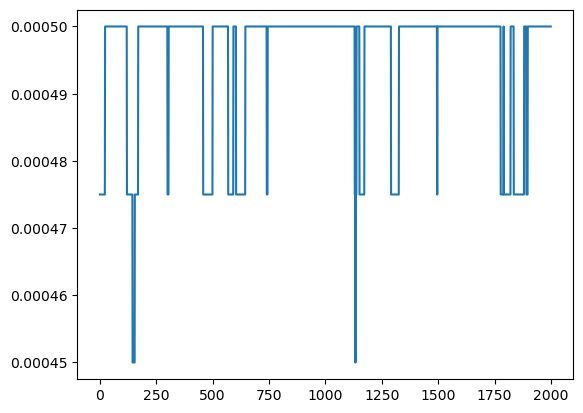

In [166]:
loss, real_loss = compute_losses_s(2000, 0.1, m, d, s)
plt.plot(loss)

In [174]:
X, y, theta_true = generate_data(m, d, s)
losses = []
real_loss = []


s = 5
theta = [0] * int(d - s) + [1] * int(s)
random.shuffle(theta) # initialize theta randomly with 0 and 1s
theta = np.array(theta)

log_likelihood(X, y, theta)

4371.254929742236

In [171]:
s

20.0